In [9]:
import json
import numpy as np
import os, sys

In [10]:
from optparse import OptionParser
import subprocess
import array
from  array import array
import numpy as np
import json

import ROOT
from ROOT import TGraph, TLatex, TFile, TLine, TLegend, TCanvas, kOrange, kBlue, kGreen, kTRUE, kBlack, gStyle, gROOT

gStyle.SetOptStat(0)
gROOT.SetBatch(kTRUE)


Welcome to JupyROOT 6.14/09


In [31]:
f = open('tight_v4/2016/ttbarfits_fwd_limit_2x1/ttbar-RSGluon2000_area/rpf_params_QCD_fwd16rpf_fitb.txt')

In [32]:
lines = f.readlines()

In [62]:
files = [
    'tight_v4/2016/ttbarfits_cen_limit_3x1/ttbar-RSGluon2000_area/rpf_params_QCD_cen16rpf_fitb.txt',
    'tight_v4/2016/ttbarfits_fwd_limit_2x1/ttbar-RSGluon2000_area/rpf_params_QCD_fwd16rpf_fitb.txt',
    'tight_v4/2017/ttbarfits_cen_limit_1x1/ttbar-RSGluon2000_area/rpf_params_QCD_cen17rpf_fitb.txt',
    'tight_v4/2017/ttbarfits_fwd_limit_1x1/ttbar-RSGluon2000_area/rpf_params_QCD_fwd17rpf_fitb.txt',
    'tight_v4/2018/ttbarfits_cen_limit_1x1/ttbar-RSGluon2000_area/rpf_params_QCD_cen18rpf_fitb.txt',
    'tight_v4/2018/ttbarfits_fwd_limit_3x1/ttbar-RSGluon2000_area/rpf_params_QCD_fwd18rpf_fitb.txt'
]

strings = ['\tp0', '\tp1', '\tp2', '\tp3', '\tp4']
for f in files:
    lines = open(f).readlines()
    for i, l in enumerate(lines): 
        p = l.split(' ')
        strings[i] += ' & $' + str(np.round(float(p[1]),2)) + ' \pm ' + str(np.round(float(p[3]),2)) +  '$ '

    for i in range(len(strings)):
        if i > len(lines) - 1:
            strings[i] += ' & -  '

            

In [63]:
for s in strings:
    print s

	p0 & $0.02 \pm 0.01$  & $0.02 \pm 0.01$  & $0.02 \pm 0.01$  & $0.03 \pm 0.01$  & $0.02 \pm 0.01$  & $0.02 \pm 0.01$ 
	p1 & $-0.04 \pm 0.03$  & $-0.01 \pm 0.01$  & $0.01 \pm 0.01$  & $0.03 \pm 0.01$  & $0.01 \pm 0.01$  & $-0.07 \pm 0.03$ 
	p2 & $0.12 \pm 0.09$  & $0.04 \pm 0.02$  & $33.48 \pm 13.19$  & $11.07 \pm 3.1$  & $21.23 \pm 9.79$  & $0.2 \pm 0.09$ 
	p3 & $-0.09 \pm 0.07$  & $27.33 \pm 17.99$  & -   & -   & -   & $-0.12 \pm 0.07$ 
	p4 & $37.23 \pm 20.82$  & -   & -   & -   & -   & $12.15 \pm 6.31$ 


In [ ]:
QCD_fwd16rpf_par0: 0.0173481772655 +/- 0.0100403928056
QCD_fwd16rpf_par1: -0.0105406057049 +/- 0.0109652092757
QCD_fwd16rpf_par2: 0.0366278059855 +/- 0.0246327867059
QCD_fwd16rpf_par3: 27.3330319296 +/- 17.993479497

In [ ]:
p0 & 0.02 \pm 0.01   & 0.02 +/- 0.01      
p1 & -0.04 \pm 0.03  & -0.01 +/- 0.01      
p2 & 0.12 \pm 0.09   & 0.04 +/- 0.02      
p3 & -0.09 \pm 0.07	 & 27.33 +/- 17.99       
p4 & 37.23 \pm 20.82 & -                

In [4]:
rootfile = '/eos/home-m/mmorris/Documents/TTbarResonance/twodalphabet/Run2_deepak8_tight_to_mediumnotight_rebinned/TTbarAllHad16_Data.root'

r = TFile.Open(rootfile)


rootfile

'/eos/home-m/mmorris/Documents/TTbarResonance/twodalphabet/Run2_deepak8_tight_to_mediumnotight_rebinned/TTbarAllHad16_Data.root'

In [12]:
# Theory limit Z' 1%
xs =   {5.83131e+01, 1.36051e+01, 4.50540e+00, 1.80866e+00, 8.13716e-01, 3.97420e-01, 2.05510e-01, 1.10890e-01, 6.17038e-02, 3.52336e-02, 2.05665e-02, 1.21935e-02, 7.34662e-03, 4.46826e-03, 2.75870e-03, 1.72335e-03, 1.09115e-03, 6.99838e-04, 4.58135e-04, 3.04742e-04, 2.07506e-04, 1.44911e-04, 1.03407e-04, 7.60116e-05, 5.71530e-05, 4.42244e-05, 3.49246e-05};
mass = {0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6,6.25,6.5,6.75,7};


# Theory limit Z' 10%
xs =    {5.36522e+02, 1.31954e+02, 4.48526e+01, 1.83735e+01, 8.47610e+00, 4.24656e+00, 2.26215e+00, 1.26395e+00, 7.34314e-01, 4.41032e-01, 2.72788e-01, 1.73249e-01, 1.12874e-01, 7.53710e-02, 5.15542e-02, 3.61230e-02, 2.59114e-02, 1.90265e-02, 1.42839e-02, 1.09496e-02, 8.55804e-03, 6.80722e-03, 5.50276e-03, 4.50943e-03, 3.74190e-03, 3.13889e-03, 2.65864e-03};
mass =  {0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6,6.25,6.5,6.75,7};

# Theory limit Z' 30%
xs =   [1.32811e+03, 3.61926e+02, 1.29361e+02, 5.52047e+01, 2.65207e+01, 1.38696e+01, 7.74166e+00, 4.55142e+00, 2.79430e+00, 1.78062e+00, 1.17252e+00, 7.95149e-01, 5.53916e-01, 3.95485e-01, 2.88839e-01, 2.15406e-01, 1.63747e-01, 1.26704e-01, 9.95997e-02, 7.94496e-02, 6.42139e-02, 5.25241e-02, 4.34250e-02, 3.62486e-02, 3.05223e-02, 2.59064e-02, 2.21476e-02]
mass = [0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6,6.25,6.5,6.75,7]

In [18]:
for i in range(len(xs)):
    if '75' not in str(mass[i]) and '6.5' not in str(mass[i]) and '25' not in str(mass[i]) :
        print xs[i], '\t', mass[i]

1328.11 	0.5
129.361 	1
26.5207 	1.5
7.74166 	2
2.7943 	2.5
1.17252 	3
0.553916 	3.5
0.288839 	4
0.163747 	4.5
0.0995997 	5
0.0642139 	5.5
0.043425 	6
0.0221476 	7


In [ ]:
1328.11 	0.5
129.361 	1
26.5207 	1.5
7.74166 
2.7943 
1.17252 
0.553916 
0.288839 
0.163747 
0.0995997
0.043425 
0.0221476


In [5]:
n = [1150*0.1085,
1150*0.05567,
1150*0.03084,
1150*0.01773,
1150*0.01072,
1150*0.006683,
1150*0.002336,
1150*0.0009484,
1150*0.0008559,
1150*0.0003873,
1150*0.0001969,
1150*0.0001082,
1150*0.00003302,
1150*0.00001676]

for ns in n:
    print(ns)

124.775
64.0205
35.466
20.3895
12.328
7.68545
2.6864
1.09066
0.984285
0.445395
0.226435
0.12443
0.037973
0.019274


In [9]:
129.361/0.1085, 7.74166/0.006683, 2.7943/0.0009484

(1192.2672811059906, 1158.4108933113873, 2946.3306621678616)

In [5]:
allplots = '/eos/home-m/mmorris/Documents/TTbarResonance/backgroundEstimate/restarting_10172023/CMSSW_10_6_14/src/BstarToTW_CMSDAS2023_BackgroundEstimation/tight_rebinned/ttbarfits_cen_3x1/ttbar-RSGluon2000_area/plots_fit_b/all_plots.root'

r2 = TFile.Open(allplots)

In [6]:
r2.ls()

TFile**		/eos/home-m/mmorris/Documents/TTbarResonance/backgroundEstimate/restarting_10172023/CMSSW_10_6_14/src/BstarToTW_CMSDAS2023_BackgroundEstimation/tight_rebinned/ttbarfits_cen_3x1/ttbar-RSGluon2000_area/plots_fit_b/all_plots.root	
 TFile*		/eos/home-m/mmorris/Documents/TTbarResonance/backgroundEstimate/restarting_10172023/CMSSW_10_6_14/src/BstarToTW_CMSDAS2023_BackgroundEstimation/tight_rebinned/ttbarfits_cen_3x1/ttbar-RSGluon2000_area/plots_fit_b/all_plots.root	
  KEY: TH2F	data_obs_cen18Fail_prefit_2D;1	Data, cen18Fail, prefit
  KEY: TH1D	data_obs_cen18Fail_prefit_projx0;1	Data, cen18Fail, prefit, 800-1500
  KEY: TH1D	data_obs_cen18Fail_prefit_projx1;1	Data, cen18Fail, prefit, 1500-2500
  KEY: TH1D	data_obs_cen18Fail_prefit_projx2;1	Data, cen18Fail, prefit, 2500-6500
  KEY: TH1D	data_obs_cen18Fail_prefit_projy0;1	Data, cen18Fail, prefit, 25-125
  KEY: TH1D	data_obs_cen18Fail_prefit_projy1;1	Data, cen18Fail, prefit, 125-225
  KEY: TH1D	data_obs_cen18Fail_prefit_projy2;1	Data, ce

In [43]:
h0 = r2.Get('data_obs_cen18Pass_prefit_projy0;1')
h1 = r2.Get('data_obs_cen18Pass_prefit_projy1;1')
h2 = r2.Get('data_obs_cen18Pass_prefit_projy2;1')
h2d = r2.Get('18_TTbar_cen18Pass_postfit_2D;1')

In [9]:
[800] + list(np.arange(1000, 4000, 300)) + [6500]

[800, 1000, 1300, 1600, 1900, 2200, 2500, 2800, 3100, 3400, 3700, 6500]

In [42]:
h0.GetEntries() + h1.GetEntries() + h2.GetEntries()

2329.0000125169754

In [45]:
h2d.GetEntries()

540.0

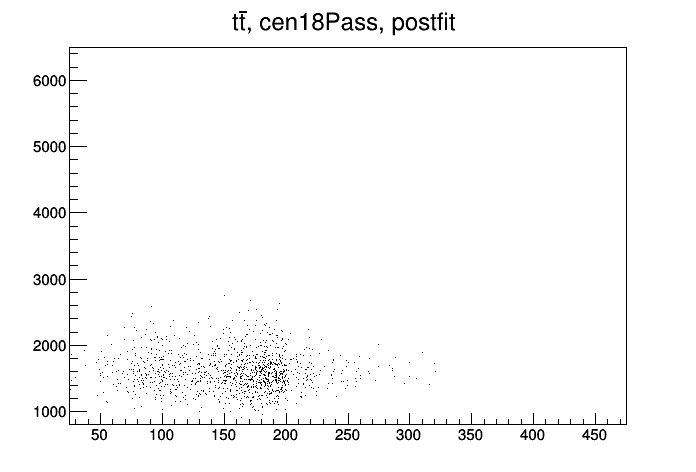

In [47]:
c = TCanvas()
h2d.Draw()
c.Draw()

In [17]:
r.ls()

TFile**		/eos/home-m/mmorris/Documents/TTbarResonance/twodalphabet/Run2_deepak8_tight_to_mediumnotight_rebinned/TTbarAllHad16_Data.root	
 TFile*		/eos/home-m/mmorris/Documents/TTbarResonance/twodalphabet/Run2_deepak8_tight_to_mediumnotight_rebinned/TTbarAllHad16_Data.root	
  KEY: TH2D	MttvsMt16Pass;1	Counts
  KEY: TH2D	MttvsMt16Fail;1	Counts
  KEY: TH2D	MttvsMtcen16Pass;1	Counts
  KEY: TH2D	MttvsMtcen16Fail;1	Counts
  KEY: TH2D	MttvsMtfwd16Pass;1	Counts
  KEY: TH2D	MttvsMtfwd16Fail;1	Counts
  KEY: TH2D	MttvsMtcen0b16Pass;1	Counts
  KEY: TH2D	MttvsMtcen0b16Fail;1	Counts
  KEY: TH2D	MttvsMtfwd0b16Pass;1	Counts
  KEY: TH2D	MttvsMtfwd0b16Fail;1	Counts
  KEY: TH2D	MttvsMtcen1b16Pass;1	Counts
  KEY: TH2D	MttvsMtcen1b16Fail;1	Counts
  KEY: TH2D	MttvsMtfwd1b16Pass;1	Counts
  KEY: TH2D	MttvsMtfwd1b16Fail;1	Counts
  KEY: TH2D	MttvsMtcen2b16Pass;1	Counts
  KEY: TH2D	MttvsMtcen2b16Fail;1	Counts
  KEY: TH2D	MttvsMtfwd2b16Pass;1	Counts
  KEY: TH2D	MttvsMtfwd2b16Fail;1	Counts


In [30]:
r.ls()

TFile**		/eos/home-m/mmorris/Documents/TTbarResonance/twodalphabet/Run2_deepak8_tight_to_mediumnotight_rebinned/TTbarAllHad16_Data.root	
 TFile*		/eos/home-m/mmorris/Documents/TTbarResonance/twodalphabet/Run2_deepak8_tight_to_mediumnotight_rebinned/TTbarAllHad16_Data.root	
  KEY: TH2D	MttvsMt16Pass;1	Counts
  KEY: TH2D	MttvsMt16Fail;1	Counts
  KEY: TH2D	MttvsMtcen16Pass;1	Counts
  KEY: TH2D	MttvsMtcen16Fail;1	Counts
  KEY: TH2D	MttvsMtfwd16Pass;1	Counts
  KEY: TH2D	MttvsMtfwd16Fail;1	Counts
  KEY: TH2D	MttvsMtcen0b16Pass;1	Counts
  KEY: TH2D	MttvsMtcen0b16Fail;1	Counts
  KEY: TH2D	MttvsMtfwd0b16Pass;1	Counts
  KEY: TH2D	MttvsMtfwd0b16Fail;1	Counts
  KEY: TH2D	MttvsMtcen1b16Pass;1	Counts
  KEY: TH2D	MttvsMtcen1b16Fail;1	Counts
  KEY: TH2D	MttvsMtfwd1b16Pass;1	Counts
  KEY: TH2D	MttvsMtfwd1b16Fail;1	Counts
  KEY: TH2D	MttvsMtcen2b16Pass;1	Counts
  KEY: TH2D	MttvsMtcen2b16Fail;1	Counts
  KEY: TH2D	MttvsMtfwd2b16Pass;1	Counts
  KEY: TH2D	MttvsMtfwd2b16Fail;1	Counts


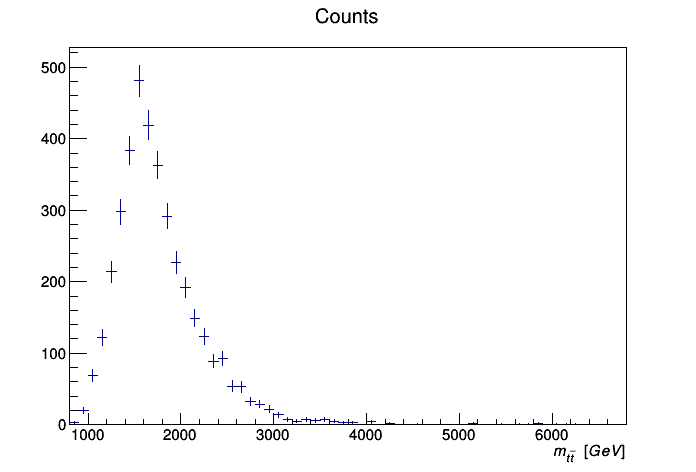

In [28]:
c = TCanvas()
r.Get('MttvsMtcen16Pass;1').ProjectionY().Draw()
c.Draw()

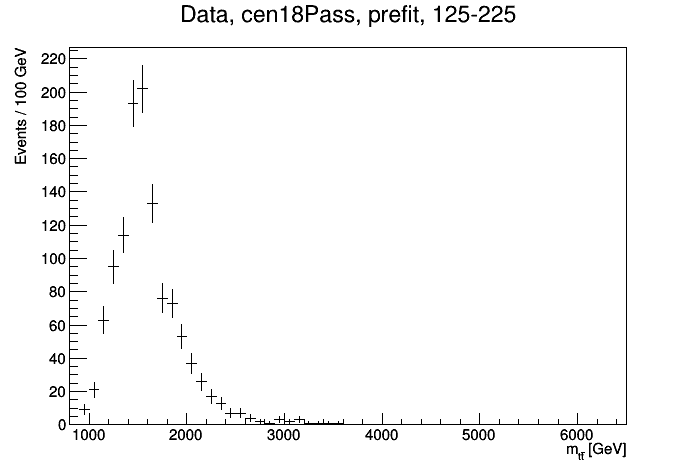

In [29]:
c = TCanvas()
h2.Draw()
c.Draw()

In [30]:
histname = 'cen16'

h = r.Get('MttvsMt'+histname+'Pass;1').ProjectionY()
hmt = r.Get('MttvsMt'+histname+'Pass;1').ProjectionX()
h2d = r.Get('MttvsMt'+histname+'Pass;1')



In [31]:
h.GetEntries(), h2.GetEntries()

(3801.0, 1161.0000190734863)

In [35]:
h0.GetEntries() + h1.GetEntries() + h2.GetEntries()

2329.0000125169754

In [27]:
h2.GetEntries()

1161.0000190734863

In [38]:
hmt.GetEntries()

3796.0

In [51]:
h2d.GetBinContent(2,2)


0.3285277783870697

In [53]:
for i in range(1,22):
    for j in range(1,22):
        print(h2d.GetBinContent(i,j))
        print ''

0.0293702874333

0.20994669199

0.406561136246

0.880226194859

1.31782972813

1.89602434635

1.68548667431

2.5849635601

2.80204296112

2.25824785233

1.36314690113

1.27120602131

0.829532444477

0.752034127712

0.414795070887

0.584269881248

0.373841106892

0.229006752372

0.211460471153

0.184299960732

0.148959323764

0.10631723702

0.328527778387

0.839875102043

2.10574603081

2.59153366089

4.71990633011

6.38349819183

8.78997039795

6.34961032867

5.38538217545

3.64095830917

2.87678050995

2.41521167755

1.48773920536

1.11784374714

0.615776717663

0.814142823219

0.535003900528

0.401543885469

0.337512016296

0.296564102173

0.0435492061079

0.881501376629

2.14998340607

4.60778141022

7.52414989471

12.3630342484

19.8143978119

25.2394809723

20.8581447601

13.8308811188

11.4554042816

8.92371749878

6.01898241043

4.34423971176

4.20962047577

2.69199562073

2.10977244377

1.26168525219

0.764779925346

0.62055772543

0.458850592375

0.423958420753

0.565136730671

In [40]:
for i in range(1,22):
    print(int(h.GetBinCenter(i) - h.GetBinWidth(i)/2))
    print(h.GetBinContent(i))
    print ''

800
3.0

900
20.0

1000
69.0

1100
122.0

1200
214.0

1300
298.0

1400
383.0

1500
481.0

1600
419.0

1700
363.0

1800
292.0

1900
227.0

2000
192.0

2100
149.0

2200
123.0

2300
89.0

2400
93.0

2500
54.0

2600
53.0

2700
32.0

2800
29.0



In [7]:
for i in range(1,22):
    print(int(hmt.GetBinCenter(i) - hmt.GetBinWidth(i)/2))

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500


In [52]:
new_x_bins = [0,
25,
50,
75,
100,
125,
150,
175,
200,
225,
250,
275,
300,
325,
350,
375,
400,
425,
450,
475,
500]
new_y_bins = [800,
1100,
1400,
1700,
2000,
2100,
2200,
2300,
2600,
2900,
3200,
3500,
3600,
3700,
4100,
4400,
4700,
5000,
5300,
5600,
5900,
6200,
6500,
6800]

r.Get('MttvsMtcenPass;1').SetBins(len(new_x_bins) - 1, array("d", new_x_bins), len(new_y_bins) - 1, array("d", new_y_bins))




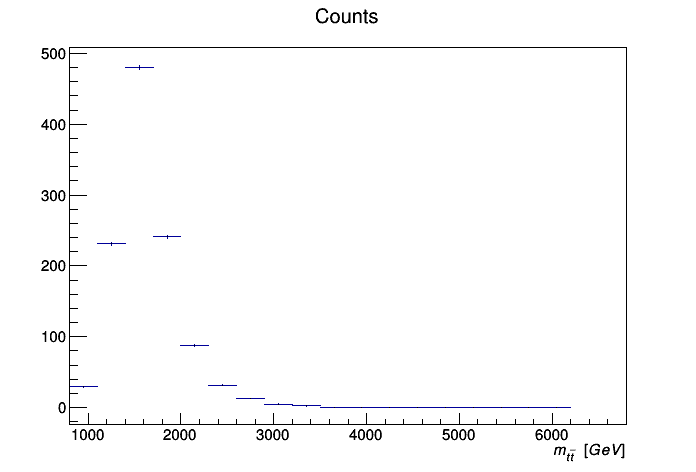

In [53]:
c = TCanvas()
r.Get('MttvsMtcenPass;1').ProjectionY().Draw()
c.Draw()

In [54]:
hnew = r.Get('MttvsMtcenPass;1').ProjectionY()

In [55]:
for i in range(1,30):
    print(int(hnew.GetBinCenter(i) - hnew.GetBinWidth(i)/2))

800
1100
1400
1700
2000
2300
2600
2900
3200
3500
3800
4100
4400
4700
5000
5300
5600
5900
6200
6500
6800
7100
7400
7700
8000
8300
8600
8900
9200


In [ ]:
histogram = file.Get("your_histogram_name")

Define your new binning
new_x_bins = [bin_edge_1, bin_edge_2, ..., bin_edge_n_x]
new_y_bins = [bin_edge_1, bin_edge_2, ..., bin_edge_n_y]

Set the new bins
histogram.SetBins(len(new_x_bins) - 1, array("d", new_x_bins), len(new_y_bins) - 1, array("d", new_y_bins))

In [30]:
for i in range(1,22):
    print(int(hmt.GetBinCenter(i) - hmt.GetBinWidth(i)/2))

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500


In [25]:
h = r.Get("cen2bPass_HIGH_postfit;1")

In [21]:
h.Get("QCD").Draw()

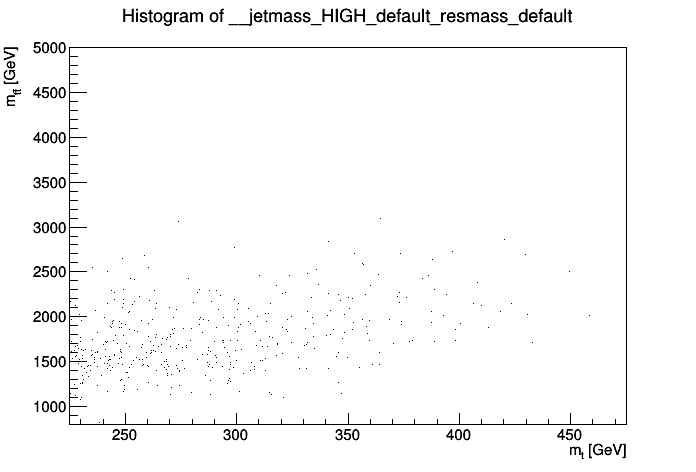

In [22]:
c.Draw()

In [5]:


th_rsgluon = np.array([275.9*1.3, 62.41*1.3, 20.05*1.3, 7.92*1.3, 3.519*1.3, 0.9528*1.3, 0.3136*1.3, 0.1289*1.3, 0.0545*1.3, 0.02807*1.3, 0.01603*1.3, 0.009095*1.3, 0.005551*1.3, 0.003816*1.3])
x_rsgluon  = np.array([0.5,0.75,1,1.25,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6])

th_zprime1 = np.array([5.83131e+01, 1.36051e+01, 4.50540e+00, 1.80866e+00, 8.13716e-01, 3.97420e-01, 2.05510e-01, 1.10890e-01, 6.17038e-02, 3.52336e-02, 2.05665e-02, 1.21935e-02, 7.34662e-03, 4.46826e-03, 2.75870e-03, 1.72335e-03, 1.09115e-03, 6.99838e-04, 4.58135e-04, 3.04742e-04, 2.07506e-04, 1.44911e-04, 1.03407e-04, 7.60116e-05, 5.71530e-05, 4.42244e-05, 3.49246e-05])
x_zprime1  = np.array([0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6,6.25,6.5,6.75,7])


th_zprime10 = np.array([5.36522e+02, 1.31954e+02, 4.48526e+01, 1.83735e+01, 8.47610e+00, 4.24656e+00, 2.26215e+00, 1.26395e+00, 7.34314e-01, 4.41032e-01, 2.72788e-01, 1.73249e-01, 1.12874e-01, 7.53710e-02, 5.15542e-02, 3.61230e-02, 2.59114e-02, 1.90265e-02, 1.42839e-02, 1.09496e-02, 8.55804e-03, 6.80722e-03, 5.50276e-03, 4.50943e-03, 3.74190e-03, 3.13889e-03, 2.65864e-03])
x_zprime10  = np.array([0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6,6.25,6.5,6.75,7])

th_zprime30 = np.array([1.32811e+03, 3.61926e+02, 1.29361e+02, 5.52047e+01, 2.65207e+01, 1.38696e+01, 7.74166e+00, 4.55142e+00, 2.79430e+00, 1.78062e+00, 1.17252e+00, 7.95149e-01, 5.53916e-01, 3.95485e-01, 2.88839e-01, 2.15406e-01, 1.63747e-01, 1.26704e-01, 9.95997e-02, 7.94496e-02, 6.42139e-02, 5.25241e-02, 4.34250e-02, 3.62486e-02, 3.05223e-02, 2.59064e-02, 2.21476e-02])
x_zprime30  = np.array([0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6,6.25,6.5,6.75,7])

th_zprimeDM = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1]) 
x_zprimeDM  = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])


In [12]:
have = [1.0, 
            1.2,
            1.4,
            1.6,
            1.8,
            2.0,
            2.5, 
            3.0, 
            3.5, 
            4.0, 
            4.5]

k = 0
for i in range(len(x_zprime1)):
    print(x_zprime1[i], have[k])
    if x_zprime1[i] == have[k]:
        k = k+1
        print x_zprime1[i], th_zprime1[i]

(0.5, 1.0)
(0.75, 1.0)
(1.0, 1.0)
1.0 4.5054
(1.25, 1.2)
(1.5, 1.2)
(1.75, 1.2)
(2.0, 1.2)
(2.25, 1.2)
(2.5, 1.2)
(2.75, 1.2)
(3.0, 1.2)
(3.25, 1.2)
(3.5, 1.2)
(3.75, 1.2)
(4.0, 1.2)
(4.25, 1.2)
(4.5, 1.2)
(4.75, 1.2)
(5.0, 1.2)
(5.25, 1.2)
(5.5, 1.2)
(5.75, 1.2)
(6.0, 1.2)
(6.25, 1.2)
(6.5, 1.2)
(6.75, 1.2)
(7.0, 1.2)


In [142]:


th_rsgluon = list( 1.3 * np.array([20.05, 3.519, 0.9528, 0.3136, 0.1289, 0.0545, 0.02807, 0.01603, 0.009095] ) )
x_rsgluon   = [1,1.5,2,2.5,3,3.5,4,4.5,5]

th_zprime1  = [4.50540e+00, 2.05510e-01, 2.05665e-02, 2.75870e-03]
x_zprime1   = [1,2,3,3,4]

th_zprime10 = [4.48526e+01, 2.26215e+00, 2.72788e-01, 5.15542e-02]
x_zprime10  = [1,2,3,4]



th_zprime30 = [1.29361e+02, 7.74166e+00, 1.17252e+00, 2.88839e-01]
x_zprime30  = [1,2,3,4]


th_zprimeDM = [-1, -1, -1, -1, -1, -1, -1, -1, -1] 
x_zprimeDM  = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [151]:
ex_zprimeDM = [2.222,
0.387,
0.09428,
0.0279,
0.009327,
0.003507,
0.001484,
0.0007087,
0.0003801,]

ex_rsgluon = [21.03,
3.656,
0.9417,
0.3039,
0.1163,
0.05138,
0.02556,
0.01422,
0.008631,]


ex_zprime10 = [0.3622,
0.01895,
0.002112,
0.0003889,]

ex_zprime30 = [0.1081,
0.006689,
0.0009523,
0.0002273,]

In [152]:
zprimeDM_xs = {
    '1000': 2.222,
    '1500': 0.387,
    '2000': 0.09428,
    '2500': 0.0279,
    '3000': 0.009327,
    '3500': 0.003507,
    '4000': 0.001484,
    '4500': 0.0007087,
    '5000': 0.0003801,
}

zprime10_xs = {
    '1000': 0.3622,
    '2000': 0.01895,
    '3000': 0.002112,
    '4000': 0.0003889,
}

zprime30_xs = {
    '1000': 0.1081,
    '2000': 0.006689,
    '3000': 0.0009523,
    '4000': 0.0002273,
}

rsgluon_xs = {
    '1000': 21.03,
    '1500': 3.656,
    '2000': 0.9417,
    '2500': 0.3039,
    '3000': 0.1163,
    '3500': 0.05138,
    '4000': 0.02556,
    '4500': 0.01422,
    '5000': 0.008631,
}

In [153]:
type(zprimeDM_xs.values())

list

In [154]:
np.array([item for key, item in rsgluon_xs.items()])[::-1]

array([2.103e+01, 9.417e-01, 3.039e-01, 1.422e-02, 5.138e-02, 1.163e-01,
       8.631e-03, 3.656e+00, 2.556e-02])

In [155]:

data = {
    
    'rsgluon': {
        'theory' : th_rsgluon,
        'expected': ex_rsgluon,
        'mass': x_rsgluon,
    },
    
    'zprime1': {
        'theory' : th_zprime1,
        'expected': [],
        'mass': x_zprime1,
    },
        
    'zprime10': {
        'theory' : th_zprime10,
        'expected': ex_zprime10,
        'mass': x_zprime10,
    },
    
    'zprime30': {
        'theory' : th_zprime30,
        'expected': ex_zprime30,
        'mass': x_zprime30,
    },
    'zprimeDM': {
        'theory' : th_zprimeDM,
        'expected': ex_zprimeDM,
        'mass': x_zprimeDM,
    }
}



In [156]:
print json.dumps(data, indent=4)

{
    "zprime30": {
        "expected": [
            0.1081, 
            0.006689, 
            0.0009523, 
            0.0002273
        ], 
        "mass": [
            1, 
            2, 
            3, 
            4
        ], 
        "theory": [
            129.361, 
            7.74166, 
            1.17252, 
            0.288839
        ]
    }, 
    "zprime1": {
        "expected": [], 
        "mass": [
            1, 
            2, 
            3, 
            3, 
            4
        ], 
        "theory": [
            4.5054, 
            0.20551, 
            0.0205665, 
            0.0027587
        ]
    }, 
    "zprime10": {
        "expected": [
            0.3622, 
            0.01895, 
            0.002112, 
            0.0003889
        ], 
        "mass": [
            1, 
            2, 
            3, 
            4
        ], 
        "theory": [
            44.8526, 
            2.26215, 
            0.272788, 
            0.0515542
        ]
    }, 
   

In [157]:
with open('signal_xs.json', 'w') as outfile:
    json.dump(data, outfile, indent=4)

# 𝑍′→𝑡𝑡¯  Background Estimation
Adapted from background estimation for the 2023 CMSDAS $b^\ast \to tW$ exercise, using the updated version of 2DAlphabet

## Getting started (in bash shell)

First, ensure that you have [SSH keys tied to your github account](https://docs.github.com/en/authentication/connecting-to-github-with-ssh/generating-a-new-ssh-key-and-adding-it-to-the-ssh-agent) and that they've been added to the ssh-agent:
```
eval "$(ssh-agent -s)"
ssh-add ~/.ssh/id_xyz
```
This step is necessary for cloning some of the Combine tools used in the 2DAlphabet installation.

### Setup CMSSW and 2DAlphabet environment:
Assuming you've already created the `~/public/CMSDAS2023/` directory, first create the CMSSW environment:
```
ssh -XY USERNAME@lxplus.cern.ch
export SCRAM_ARCH=slc7_amd64_gcc700
cd public/CMSDAS2023/
cmsrel CMSSW_10_6_14
cd CMSSW_10_6_14/src
cmsenv
```

Now set up 2DAlphabet:
```
cd ~/public/CMSDAS2023/CMSSW_10_6_14/src/
git clone https://github.com/mdmorris/2DAlphabet.git
git clone --branch 102x https://github.com/cms-analysis/HiggsAnalysis-CombinedLimit.git HiggsAnalysis/CombinedLimit
curl -s https://raw.githubusercontent.com/lcorcodilos/CombineHarvester/master/CombineTools/scripts/sparse-checkout-ssh.sh | bash
scram b clean; scram b -j 4
cmsenv
```

Now, create a virtual environment in which to install 2DAlphabet:
```
python -m virtualenv twoD-env
source twoD-env/bin/activate
cd 2DAlphabet
python setup.py develop
```

Then, check that the 2DAlphabet installation worked by opening a python shell:
```
python
```
then, inside the python shell:
```
import ROOT
r = ROOT.RooParametricHist()
```

### Finally, clone this repo to the `src` directory as well:
```
cd ~/public/CMSDAS2023/CMSSW_10_6_14/src/
git clone https://github.com/mdmorris/BstarToTW_CMSDAS2023_BackgroundEstimation.git
```
OR fork the code onto your own personal space and set the upstream:
```
https://github.com/<USERNAME>/BstarToTW_CMSDAS2023_BackgroundEstimation.git
cd BstarToTW_CMSDAS2023_BackgroundEstimation
git remote add upstream https://github.com/mdmorris/BstarToTW_CMSDAS2023_BackgroundEstimation.git
git remote -v
```

## What to do after reconnecting to LXPLUS:
Go back to the directory where you installed 2DAlphabet and where the virtual environment resides:
```
ssh -XY USERNAME@lxplus.cern.ch
cd ~/public/CMSDAS2023/CMSSW_10_6_14/src/
cmsenv
source twoD-env/bin/activate
```
Then you should be good to go!

## Background estimate
For this exercise we will use the [`2DAlphabet`](https://github.com/mdmorris/2DAlphabet) github package. This package uses `.json` configuration files to specify the input histograms (to perform the fit) and the uncertainties. These uncertainties will be used inside of the `Higgs Combine` backend, the fitting package used widely within CMS. The 2DAlphabet package serves as a nice interface with Combine to allow the user to use the 2DAlphabet method without having to create their own custom version of combine. 

# Input root files

Root files with the pass and fail histograms can be found in:

`/afs/cern.ch/user/m/mmorris/public/ttbarAllHad/twodalphabet/`

# Configuration file

The configuration file that you will be using is called `bstar.json`, located in this repository. Let's take a look at this file and see the various parts:

* `GLOBAL`
  - This section contains meta information regarding the location (`path`), filenames (`FILE`), and input histogram names (`HIST`) for all ROOT files used in the background estimation procedure.
  - Everything in this section will be used in a file-wide find-and-replace. So wherever you see the name of the sub-objects in this file, it will be expanded by the value assigned to it in this section. 
  - Additionally, the `SIGNAME` list should include the name(s) of all signals you wish to investigate, so that they are added to the workspace when you run the python script.
    - If you wanted to investigate limits for only three signals, for example, you'd just add their names as given in the ROOT files to this list. 
    - For this exercise, the default is `signalLH2400`, the 2.4 TeV signal sample. You'll want to change this as the exercise progresses

* `REGIONS`
  - This section contains the various regions we are interested in transferring between.
  - Each region contains a `PROCESSES` object, listing the signals and backgrounds to be included in the fit, as well as  `BINNING` object, which is defined elsewhere in the config file.
  - The name of each region in `REGIONS` is dependent on the input histogram name, as well as your choice of `HIST` name in the `GLOBAL` section above
    - For instance, in this file we declared `HIST = MtwvMt$region`, where `$region` will be expanded as the name given in `REGIONS`. 
    - We chose this name because the input histograms are titled `MtwvMtPass` and `MtwvMtFail` for the Pass and Fail regions, respectively. 

* `PROCESSES`
  - In this section we define all of the various process ROOT files that will be used to produce the fit. These include data, signals, and backgrounds.
  - Each process contains its own set of options:
    - `SYSTEMATICS`: a list of systematic uncertainties, whose properties are defined elsewhere in the config file
    - `SCALE`: how much to scale this process by in the fit
    - `COLOR`: color to plot in the fit (ROOT color schema)
    - `TYPE`: `DATA`, `BKG`, `SIGNAL`
    - `TITLE`: label in the plot legend (LaTeX compatible)
    - `ALIAS`: if the process has a different filename than standard, this will be what replaces `process` in the 
`GLOBAL` section's `FILE` option, so that this process gets picked up properly
    - `LOC`: the location of the file, using the definitions laid out in `GLOBAL`

* `SYSTEMATICS`
  - This contains the names of all systematic uncertainties you want to apply to the various processes.
  - The `CODE` key describes the type of systematic that will be used in Combine.
  - The `VAL` key is how we assign the value of that uncertainty. For instance, a `VAL` of `1.018` in the `lumi` (luminosity) means that this systematic has a 1.8\% uncertainty on the yield.

* `BINNING`
  - This section allows us to name and define custom binning schema. After naming the schema, one would define several variables for both `X` and `Y`:
    - `NAME`: allows us to denote what is being plotted on the given axis
    - `TITLE`: the axis label for the plot (LaTeX enabled)
    - `BINS`: a list of bins
    - `SIGSTART`, `SIGEND`: the bins defining a window `[SIGSTART, SIGEND]` around which to blind (if the blinded option is selected)

* `OPTIONS`
  - A list of boolean and other options to be considered when generating the fit
  - (explanation WIP)

# Running the ML fit
By default, the `ttbar.py` python API should set up a workspace, perform the ML fit, and plot the distributions. 

```
python ttbar.py
```

The output is stored in the `ttbarfits/` output directory by default.

# Running the ML fit for b-tag and y analysis regions

run the `python ttbar.py` command for all 6 regions:

```
cd regions/2016
python ttbar.py cen0b
python ttbar.py cen1b
python ttbar.py cenbb
python ttbar.py fwd0b
python ttbar.py fwd1b
python ttbar.py fwd2b

```

This will create separate directories labelled by the region and function, for example 

```
ttbarfits_cen0b_3x1
```

In the ttbarfits directory, data cards are saved in the signal{XXXXX} directories. In order to combine the data cards from all 6 regions into one inclusive data card, run (still in the `regions/2016` directory)

```
./combine_cards.sh
```

The combineTool.py jobsa are submitted to condor, and when the jobs are completed the combined data cards and asysmptotic root files can be found in the new directory `regions/2016/ttbarfits_inclusive`

In order to plot the limit, run the `limits.ipynb` notebook.

Repeat these steps for 2017 and 2018 in `regions/2017` and `regions/2018`





The json files for the inclusive histograms are located in `inclusive/`
The json files for the split b-tag and y regions are locateed in `regions/2016`, `regions/2017`, and `regions/2018`

# Systematics
Systematic uncertainties were described in the config file section above. Add the Top pT uncertainties to the appropriate processes in the config file, then re-run the fit after having copied the old Combine card somewhere safe. Compare the pre- and post-Top pT Combine cards using `diff`.

# Limit setting

Limits for each signal are calculated using the `perform_limit` function in `ttbar.py`. The limits can then be plotted using the `set_limits.py` script, or interactively with the `limits.ipynb` notebook. The mass points and cross sections for each signal are located in `signal_xs.json`


In [15]:
np.arange(800,6800,300)

array([ 800, 1100, 1400, 1700, 2000, 2300, 2600, 2900, 3200, 3500, 3800,
       4100, 4400, 4700, 5000, 5300, 5600, 5900, 6200, 6500])

In [12]:
np.linspace(800,6500,20)

array([ 800., 1100., 1400., 1700., 2000., 2300., 2600., 2900., 3200.,
       3500., 3800., 4100., 4400., 4700., 5000., 5300., 5600., 5900.,
       6200., 6500.])

In [14]:
signals = os.listdir('regions/2016/ttbarfits_inclusive')

In [21]:
for signal in signals:
    if 'area' in signal:
        path = 'regions/2016/ttbarfits_inclusive/'+signal+'/higgsCombine.Test.AsymptoticLimits.mH120.root'
        if os.path.exists(path):
            print(os.path.getsize(path), signal)
        
        
        

(697, 'signalRSGluon1000_area')
(697, 'signalRSGluon1500_area')
(1014420, 'signalRSGluon2000_area')
(697, 'signalRSGluon2500_area')
(697, 'signalRSGluon3000_area')
(697, 'signalRSGluon3500_area')
(697, 'signalRSGluon4000_area')
(697, 'signalRSGluon4500_area')
(697, 'signalRSGluon5000_area')
(5846, 'signalRSGluon5500_area')
(5846, 'signalRSGluon6000_area')
(697, 'signalZPrime1000_10_area')
(697, 'signalZPrime1000_1_area')
(697, 'signalZPrime1000_30_area')
(697, 'signalZPrime1000_DM_area')
(5846, 'signalZPrime1200_10_area')
(697, 'signalZPrime1200_1_area')
(5846, 'signalZPrime1200_30_area')
(5846, 'signalZPrime1400_10_area')
(697, 'signalZPrime1400_1_area')
(5846, 'signalZPrime1400_30_area')
(697, 'signalZPrime1500_DM_area')
(697, 'signalZPrime1600_1_area')
(5846, 'signalZPrime1800_10_area')
(697, 'signalZPrime1800_1_area')
(5846, 'signalZPrime1800_30_area')
(697, 'signalZPrime2000_10_area')
(697, 'signalZPrime2000_1_area')
(697, 'signalZPrime2000_30_area')
(697, 'signalZPrime2000_DM_are

In [20]:
files = [
    'ftest_cen_0x0_vs_0x1_2016.png',
    'ftest_cen_0x0_vs_1x0_2016.png',
    'ftest_cen_0x1_vs_1x1_2016.png',
    'ftest_cen_1x0_vs_1x1_2016.png',
    'ftest_cen_1x1_vs_1x2_2016.png',
    'ftest_cen_1x1_vs_2x1_2016.png',
    'ftest_cen_1x1_vs_2x2_2016.png',
    'ftest_cen_1x1_vs_3x1_2016.png',
    'ftest_cen_1x2_vs_2x2_2016.png',
    'ftest_cen_2x1_vs_2x2_2016.png',
    'ftest_cen_2x1_vs_3x1_2016.png',
    'ftest_cen_2x2_vs_3x1_2016.png',
    'ftest_fwd_0x0_vs_0x1_2016.png',
    'ftest_fwd_0x0_vs_1x0_2016.png',
    'ftest_fwd_0x1_vs_1x1_2016.png',
    'ftest_fwd_1x0_vs_1x1_2016.png',
    'ftest_fwd_1x1_vs_1x2_2016.png',
    'ftest_fwd_1x1_vs_2x1_2016.png',
    'ftest_fwd_1x1_vs_2x2_2016.png',
    'ftest_fwd_1x1_vs_3x1_2016.png',
    'ftest_fwd_1x2_vs_2x2_2016.png',
    'ftest_fwd_2x1_vs_2x2_2016.png',
    'ftest_fwd_2x1_vs_3x1_2016.png',
    'ftest_fwd_2x2_vs_3x1_2016.png',
]

In [46]:
ftestfile = 'ftest.png'
year = '2017'
imstring = ''
labstring = ''


for year in ['2016', '2017', '2018']:

    for i, ftestfile in enumerate(files):

        ftestfile = ftestfile.replace('2016',year)


        f2 = ftestfile[10:13]
        f1 = ftestfile[17:20]

        region = ' forward' if 'fwd' in ftestfile else ' central'

        if i % 4 != 3: 
            imstring = imstring + '''            \\includegraphics[width=0.45\\linewidth]{Plots/tests/ftests/''' + ftestfile + '''}
    '''
            if i % 4 == 0:
                labstring +=  f1  + ' TF to the ' + f2 + ' TF (top left), '
            elif i % 4 == 1:
                labstring +=  f1  + ' TF to the ' + f2 + ' TF (top right), '
            elif i % 4 == 2:
                labstring +=  f1  + ' TF to the ' + f2 + ' TF (bottom left), '
            elif i % 4 == 3:
                labstring +=  'and the ' + f1 + ' TF to the ' + f2 + ' TF (bottom right).'

        else:

            imstring = imstring + '''            \\includegraphics[width=0.45\\linewidth]{Plots/tests/ftests/''' + ftestfile + '''}
    '''
            if i % 4 == 0:
                labstring +=  f1  + ' TF to the ' + f2 + ' TF (top left), '
            elif i % 4 == 1:
                labstring +=  f1  + ' TF to the ' + f2 + ' TF (top right), '
            elif i % 4 == 2:
                labstring +=  f1  + ' TF to the ' + f2 + ' TF (bottom left), '
            elif i % 4 == 3:
                labstring +=  'and the ' + f1 + ' TF to the ' + f2 + ' TF (bottom right).'







            string = '''
            \\begin{figure}[!htbp]
                \\begin{center}
    ''' + imstring + '''
                    \\caption{F-test for ''' + year + region + ''' background estimate, comparing the '''+ labstring + '''}
                    \\label{fig:ftest''' + str(i // 4) + year[2:] + '''}
                \\end{center}
            \\end{figure}
            '''
            print string
            print ''
            imstring = ''
            labstring = ''




            \begin{figure}[!htbp]
                \begin{center}
                \includegraphics[width=0.45\linewidth]{Plots/tests/ftests/ftest_cen_0x0_vs_0x1_2016.png}
                \includegraphics[width=0.45\linewidth]{Plots/tests/ftests/ftest_cen_0x0_vs_1x0_2016.png}
                \includegraphics[width=0.45\linewidth]{Plots/tests/ftests/ftest_cen_0x1_vs_1x1_2016.png}
                \includegraphics[width=0.45\linewidth]{Plots/tests/ftests/ftest_cen_1x0_vs_1x1_2016.png}
    
                    \caption{F-test for 2016 central background estimate, comparing the 0x1 TF to the 0x0 TF (top left), 1x0 TF to the 0x0 TF (top right), 1x1 TF to the 0x1 TF (bottom left), and the 1x1 TF to the 1x0 TF (bottom right).}
                    \label{fig:ftest016}
                \end{center}
            \end{figure}
            


            \begin{figure}[!htbp]
                \begin{center}
                \includegraphics[width=0.45\linewidth]{Plots/tests/ftests/ftest_cen_1x1_vs_1x2_20

In [9]:
print(string)


\begin{figure}[!htbp]
    \begin{center}
        \includegraphics[width=0.6\linewidth]{Plots/tests/ftests/ftest.png}
        \caption{F-test for 2016 Tight to Medium transfer function, comparing the 3x1 transfer function to the 2x1 transfer function.}
        \label{fig:ftest1}
    \end{center}
\end{figure}



In [16]:
idx = 10
files[0][10:13]

'0x0'

In [18]:
files[0][17:20]

'0x1'